In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import imageio as imio # Reading images
import glob

In [2]:
dataPaths = {'1':os.path.abspath(os.path.join('Data','Experiments','1.csv')),
             '2':os.path.abspath(os.path.join('Data','Experiments','2.csv')),
             '3':os.path.abspath(os.path.join('Data','Experiments','3.csv')),
             '4':os.path.abspath(os.path.join('Data','Experiments','4.csv')),             
             '34CE':os.path.abspath(os.path.join('Data','Experiments','3And4CE.csv')),
             '5':os.path.abspath(os.path.join('Data','Experiments','5.csv')),
             '6':os.path.abspath(os.path.join('Data','Experiments','6.csv')),
             '7':os.path.abspath(os.path.join('Data','Experiments','7.csv')),
             '8':os.path.abspath(os.path.join('Data','Experiments','8.csv')),
             '9':os.path.abspath(os.path.join('Data','Experiments','9.csv')),
             '10':os.path.abspath(os.path.join('Data','Experiments','10.csv')),
             '11':os.path.abspath(os.path.join('Data','Experiments','11.csv')),
             '12':os.path.abspath(os.path.join('Data','Experiments','12.csv'))}

dataImPaths = {'XTrain':os.path.abspath(os.path.join('Data','Image','XTrain')),
             'XTest':os.path.abspath(os.path.join('Data','Image','XTest')),
             'yTrain':os.path.abspath(os.path.join('Data','Image','yTrain')),
             'yTest':os.path.abspath(os.path.join('Data','Image','yTest'))}

In [3]:
def AddOneToListOfNumbers(lst):
    '''Compensate for 0 based indexing'''
    return [f+1 for f in lst]

# Experiment 1

The purpose of this experiment is to see how the model reacts to different input sizes. This experiment will determine the input size for the other experiments. The models were trained for 20 epochs using the standard categorical cross-entropy loss function to observe the effects for input size on the test SSC and IoU.
It can be observed that an input size of 319,488 works better for both SSC and IoU. Using an input size of 1,228,800 also increased training time by 4x (23s vs 84s) per epoch. Further model development will be done using the input size of 319,488, however a final comparison between the input sizes will need to be done once all of the other parameters have been selected.

In [4]:
df1 = pd.read_csv(dataPaths['1'])
df1S1 = df1.loc[df1['s'] == 1]
df1S2 = df1.loc[df1['s'] == 2]

In [5]:
df1.columns

Index(['epoch', 's', 'test', 'testSim', 'testSimRN', 'train', 'trainSim',
       'trainSimRN'],
      dtype='object')

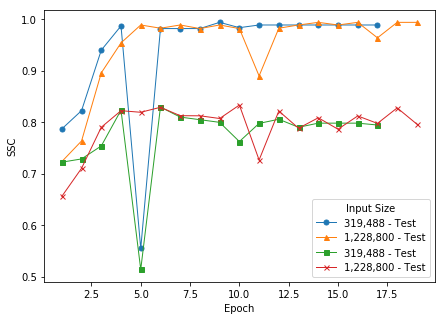

In [12]:
matplotlib.rcParams['figure.figsize'] = [7, 5]

# SSC Score Experiments 1, 2, 3
plt.plot(AddOneToListOfNumbers(list(df1S1['epoch'])),
         df1S1['trainSimRN'], marker='o', linewidth=1, markersize=5, label='319,488 - Test')
plt.plot(AddOneToListOfNumbers(list(df1S2['epoch'])),
         df1S2['trainSimRN'], marker='^', linewidth=1, markersize=5, label='1,228,800 - Test')

plt.plot(AddOneToListOfNumbers(list(df1S1['epoch'])),
         df1S1['testSimRN'], marker='s', linewidth=1, markersize=5, label='319,488 - Test')
plt.plot(AddOneToListOfNumbers(list(df1S2['epoch'])),
         df1S2['testSimRN'], marker='x', linewidth=1, markersize=5, label='1,228,800 - Test')
# y-axis limits
#plt.ylim([0.6,0.9])
# x-axis label 
plt.xlabel('Epoch') 
# y-axis label 
plt.ylabel('SSC') 
# show legend
plt.legend(title="Input Size",loc=4)
# function to show the plot 
plt.show()

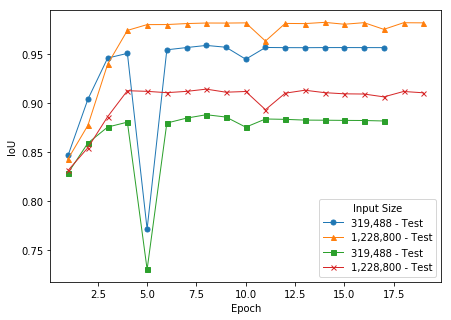

In [13]:
matplotlib.rcParams['figure.figsize'] = [7, 5]

# SSC Score Experiments 1, 2, 3
plt.plot(AddOneToListOfNumbers(list(df1S1['epoch'])),
         df1S1['train'], marker='o', linewidth=1, markersize=5, label='319,488 - Test')
plt.plot(AddOneToListOfNumbers(list(df1S2['epoch'])),
         df1S2['train'], marker='^', linewidth=1, markersize=5, label='1,228,800 - Test')

plt.plot(AddOneToListOfNumbers(list(df1S1['epoch'])),
         df1S1['test'], marker='s', linewidth=1, markersize=5, label='319,488 - Test')
plt.plot(AddOneToListOfNumbers(list(df1S2['epoch'])),
         df1S2['test'], marker='x', linewidth=1, markersize=5, label='1,228,800 - Test')
# y-axis limits
#plt.ylim([0.6,0.9])
# x-axis label 
plt.xlabel('Epoch') 
# y-axis label 
plt.ylabel('IoU') 
# show legend
plt.legend(title="Input Size",loc=4)
# function to show the plot 
plt.show()

# Experiment 2

This experiment tests the performance of the model when it is trained on the addition data created via image augmentation. The training set for random augmentation is 416 and for geometric augmentation it is 288. SSC scores for this experiment has been recorded using the noise reduction algorithm as well as without it.

In [14]:
df2 = pd.read_csv(dataPaths['2'])
df2D0 = df2.loc[df2['d'] == 0]
df2D1 = df2.loc[df2['d'] == 1]
df2D2 = df2.loc[df2['d'] == 2]
df2D3 = df2.loc[df2['d'] == 3]

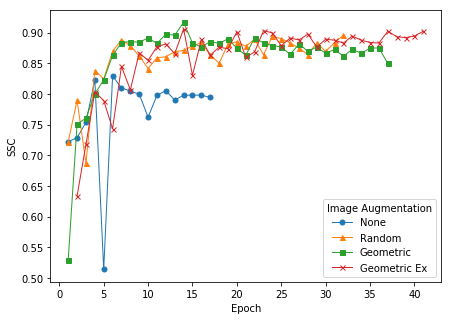

In [15]:
matplotlib.rcParams['figure.figsize'] = [7, 5]

# SSC Score Experiment 2
plt.plot(AddOneToListOfNumbers(list(df2D0['epoch'])),\
         df2D0['testSimRN'], marker='o', linewidth=1, markersize=5, label='None')
plt.plot(AddOneToListOfNumbers(list(df2D2['epoch'])),
         df2D2['testSimRN'], marker='^', linewidth=1, markersize=5, label='Random')
plt.plot(AddOneToListOfNumbers(list(df2D1['epoch'])),\
         df2D1['testSimRN'], marker='s', linewidth=1, markersize=5, label='Geometric')
plt.plot(AddOneToListOfNumbers(list(df2D3['epoch'])),\
         df2D3['testSimRN'], marker='x', linewidth=1, markersize=5, label='Geometric Ex')

# y-axis limits
#plt.ylim([0.6,0.9])
# x-axis label 
plt.xlabel('Epoch') 
# y-axis label 
plt.ylabel('SSC') 
# show legend
plt.legend(title="Image Augmentation",loc=4)
# function to show the plot 
plt.show()

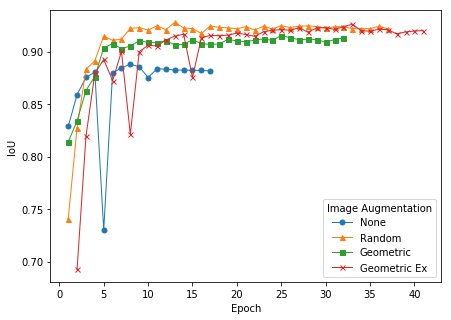

In [16]:
matplotlib.rcParams['figure.figsize'] = [7, 5]

x = AddOneToListOfNumbers(list(df2D1['epoch']))

# SSC Score Experiments 1, 2, 3
plt.plot(AddOneToListOfNumbers(list(df2D0['epoch'])),\
         df2D0['test'], marker='o', linewidth=1, markersize=5, label='None')
plt.plot(AddOneToListOfNumbers(list(df2D1['epoch'])),\
         df2D1['test'], marker='^', linewidth=1, markersize=5, label='Random')
plt.plot(AddOneToListOfNumbers(list(df2D2['epoch'])),
         df2D2['test'], marker='s', linewidth=1, markersize=5, label='Geometric')
plt.plot(AddOneToListOfNumbers(list(df2D3['epoch'])),\
         df2D3['test'], marker='x', linewidth=1, markersize=5, label='Geometric Ex')
# y-axis limits
#plt.ylim([0.6,0.9])
# x-axis label 
plt.xlabel('Epoch') 
# y-axis label 
plt.ylabel('IoU') 
# show legend
plt.legend(title="Image Augmentation",loc=4)
# function to show the plot 
plt.show()

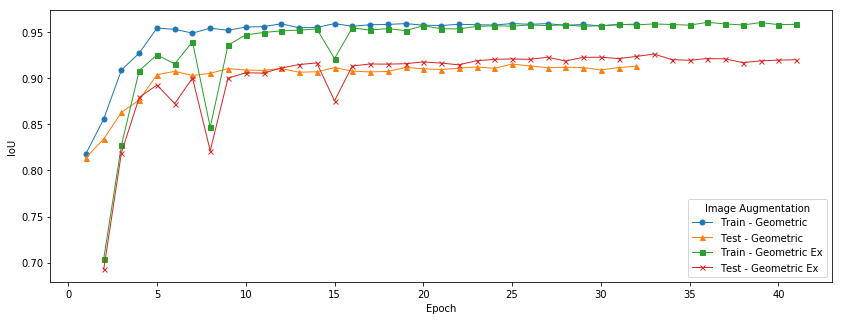

In [17]:
matplotlib.rcParams['figure.figsize'] = [14, 5]

x = AddOneToListOfNumbers(list(df2D1['epoch']))

# SSC Score Experiments 1, 2, 3
plt.plot(AddOneToListOfNumbers(list(df2D2['epoch'])),
         df2D2['train'], marker='o', linewidth=1, markersize=5, label='Train - Geometric')
plt.plot(AddOneToListOfNumbers(list(df2D2['epoch'])),
         df2D2['test'], marker='^', linewidth=1, markersize=5, label='Test - Geometric')
plt.plot(AddOneToListOfNumbers(list(df2D3['epoch'])),\
         df2D3['train'], marker='s', linewidth=1, markersize=5, label='Train - Geometric Ex')
plt.plot(AddOneToListOfNumbers(list(df2D3['epoch'])),\
         df2D3['test'], marker='x', linewidth=1, markersize=5, label='Test - Geometric Ex')
# y-axis limits
#plt.ylim([0.6,0.9])
# x-axis label 
plt.xlabel('Epoch') 
# y-axis label 
plt.ylabel('IoU') 
# show legend
plt.legend(title="Image Augmentation",loc=4)
# function to show the plot 
plt.show()

# Experiment 3
The default categorical cross-entropy loss function does not take into account class imbalance, essentially it puts more weight on classes that are represented more in images. 

In [19]:
df34CE = pd.read_csv(dataPaths['34CE'])
df3 = pd.read_csv(dataPaths['3'])
df3B05 = df3.loc[df3['b'] == 0.5]
df3B1 = df3.loc[df3['b'] == 1]
df3B3 = df3.loc[df3['b'] == 3]

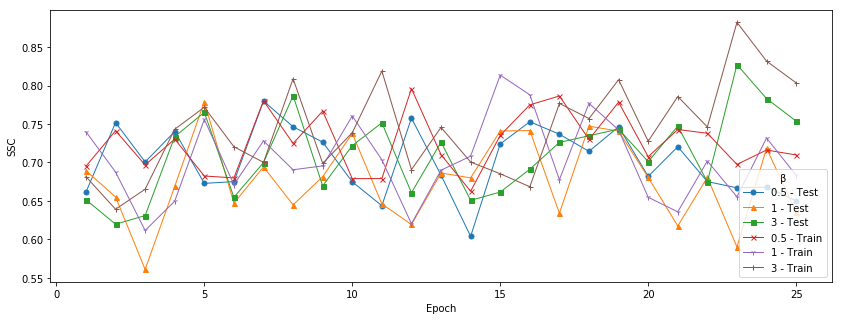

In [20]:
matplotlib.rcParams['figure.figsize'] = [14, 5]

# SSC Score Experiments 
plt.plot(AddOneToListOfNumbers(list(df3B05['epoch'])),
         df3B05['testSimRN'], marker='o', linewidth=1, markersize=5, label='0.5 - Test')
plt.plot(AddOneToListOfNumbers(list(df3B1['epoch'])),
         df3B1['testSimRN'], marker='^', linewidth=1, markersize=5, label='1 - Test')
plt.plot(AddOneToListOfNumbers(list(df3B3['epoch'])),
         df3B3['testSimRN'], marker='s', linewidth=1, markersize=5, label='3 - Test')

plt.plot(AddOneToListOfNumbers(list(df3B05['epoch'])),
         df3B05['trainSimRN'], marker='x', linewidth=1, markersize=5, label='0.5 - Train')
plt.plot(AddOneToListOfNumbers(list(df3B1['epoch'])),
         df3B1['trainSimRN'], marker='1', linewidth=1, markersize=5, label='1 - Train')
plt.plot(AddOneToListOfNumbers(list(df3B3['epoch'])),
         df3B3['trainSimRN'], marker='+', linewidth=1, markersize=5, label='3 - Train')
# y-axis limits
#plt.ylim([0.6,0.9])
# x-axis label 
plt.xlabel('Epoch') 
# y-axis label 
plt.ylabel('SSC') 
# show legend
plt.legend(title="β",loc=4)
# function to show the plot 
plt.show()

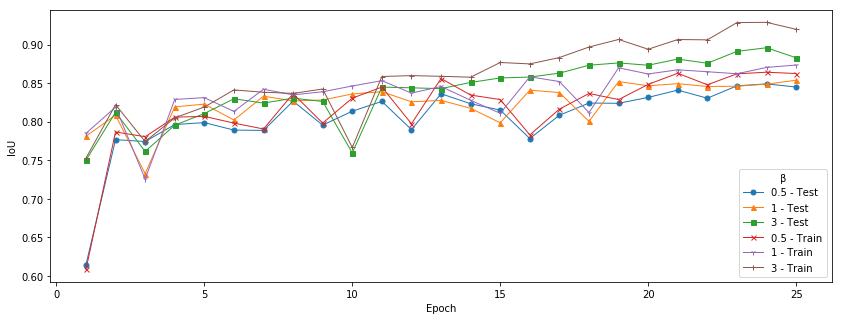

In [21]:
matplotlib.rcParams['figure.figsize'] = [14, 5]

# SSC Score Experiments 
plt.plot(AddOneToListOfNumbers(list(df3B05['epoch'])),
         df3B05['test'], marker='o', linewidth=1, markersize=5, label='0.5 - Test')
plt.plot(AddOneToListOfNumbers(list(df3B1['epoch'])),
         df3B1['test'], marker='^', linewidth=1, markersize=5, label='1 - Test')
plt.plot(AddOneToListOfNumbers(list(df3B3['epoch'])),
         df3B3['test'], marker='s', linewidth=1, markersize=5, label='3 - Test')

plt.plot(AddOneToListOfNumbers(list(df3B05['epoch'])),
         df3B05['train'], marker='x', linewidth=1, markersize=5, label='0.5 - Train')
plt.plot(AddOneToListOfNumbers(list(df3B1['epoch'])),
         df3B1['train'], marker='1', linewidth=1, markersize=5, label='1 - Train')
plt.plot(AddOneToListOfNumbers(list(df3B3['epoch'])),
         df3B3['train'], marker='+', linewidth=1, markersize=5, label='3 - Train')
# y-axis limits
#plt.ylim([0.6,0.9])
# x-axis label 
plt.xlabel('Epoch') 
# y-axis label 
plt.ylabel('IoU') 
# show legend
plt.legend(title="β",loc=4)
# function to show the plot 
plt.show()

# Experiment 4
Using TL the model can be optimised to improve SSC. 

In [22]:
df4 = pd.read_csv(dataPaths['4'])
df4B05 = df4.loc[df4['b'] == 0.5]
df4B1 = df4.loc[df4['b'] == 1]
df4B3 = df4.loc[df4['b'] == 3]

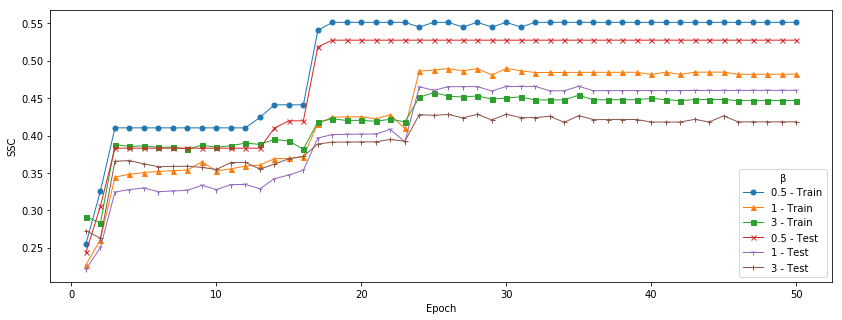

In [23]:
matplotlib.rcParams['figure.figsize'] = [14, 5]
x = AddOneToListOfNumbers(list(df4B05['epoch']))

# SSC Score Experiments 

plt.plot(x,df4B05['trainSimRN'], marker='o', linewidth=1, markersize=5, label='0.5 - Train')
plt.plot(x,df4B1['trainSimRN'], marker='^', linewidth=1, markersize=5, label='1 - Train')
plt.plot(x,df4B3['trainSimRN'], marker='s', linewidth=1, markersize=5, label='3 - Train')


plt.plot(x,df4B05['testSimRN'], marker='x', linewidth=1, markersize=5, label='0.5 - Test')
plt.plot(x,df4B1['testSimRN'], marker='1', linewidth=1, markersize=5, label='1 - Test')
plt.plot(x,df4B3['testSimRN'], marker='+', linewidth=1, markersize=5, label='3 - Test')
# y-axis limits
# plt.ylim([0.2,0.45])
# x-axis label 
plt.xlabel('Epoch') 
# y-axis label 
plt.ylabel('SSC') 
# show legend
plt.legend(title="β",loc=4)
# function to show the plot 
plt.show()

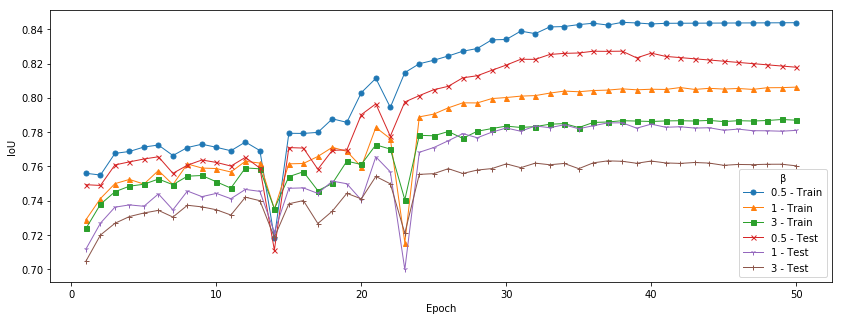

In [24]:
matplotlib.rcParams['figure.figsize'] = [14, 5]
x = AddOneToListOfNumbers(list(df4B05['epoch']))

# SSC Score Experiments 
plt.plot(x,df4B05['train'], marker='o', linewidth=1, markersize=5, label='0.5 - Train')
plt.plot(x,df4B1['train'], marker='^', linewidth=1, markersize=5, label='1 - Train')
plt.plot(x,df4B3['train'], marker='s', linewidth=1, markersize=5, label='3 - Train')

plt.plot(x,df4B05['test'], marker='x', linewidth=1, markersize=5, label='0.5 - Test')
plt.plot(x,df4B1['test'], marker='1', linewidth=1, markersize=5, label='1 - Test')
plt.plot(x,df4B3['test'], marker='+', linewidth=1, markersize=5, label='3 - Test')
# y-axis limits
# plt.ylim([0.6,0.8])
# x-axis label 
plt.xlabel('Epoch') 
# y-axis label 
plt.ylabel('IoU') 
# show legend
plt.legend(title="β",loc=4)
# function to show the plot 
plt.show()

# Experiment 5
Using a combination of loss functions can work better to optimise multiple parameters…

In [25]:
df5 = pd.read_csv(dataPaths['5'])
df5CEO = df5.loc[df5['ex'] == 'orignCE']
df5WCEO = df5.loc[df5['ex'] == 'orignWCE']
df5CEFS = df5.loc[df5['ex'] == 'fixedCESmall']
df5CEFL = df5.loc[df5['ex'] == 'fixedCELarge']

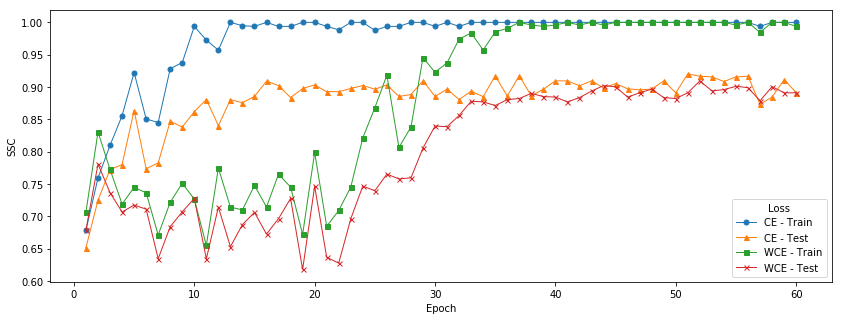

In [26]:
matplotlib.rcParams['figure.figsize'] = [14, 5]
x = AddOneToListOfNumbers(list(df5CEO['epoch']))

# SSC Score Experiments 

plt.plot(x,df5CEO['trainSimRN'], marker='o', linewidth=1, markersize=5, label='CE - Train')
plt.plot(x,df5CEO['testSimRN'], marker='^', linewidth=1, markersize=5, label='CE - Test')

plt.plot(x,df5WCEO['trainSimRN'], marker='s', linewidth=1, markersize=5, label='WCE - Train')
plt.plot(x,df5WCEO['testSimRN'], marker='x', linewidth=1, markersize=5, label='WCE - Test')


# y-axis limits
# plt.ylim([0.2,0.45])
# x-axis label 
plt.xlabel('Epoch') 
# y-axis label 
plt.ylabel('SSC') 
# show legend
plt.legend(title="Loss",loc=4)
# function to show the plot 
plt.show()

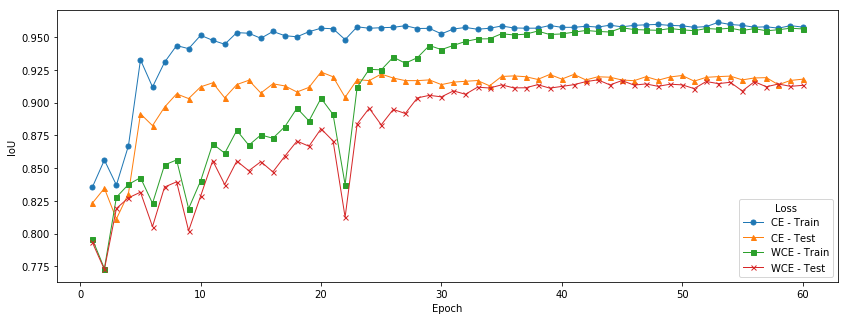

In [27]:
matplotlib.rcParams['figure.figsize'] = [14, 5]
x = AddOneToListOfNumbers(list(df5CEO['epoch']))

# SSC Score Experiments 

plt.plot(x,df5CEO['train'], marker='o', linewidth=1, markersize=5, label='CE - Train')
plt.plot(x,df5CEO['test'], marker='^', linewidth=1, markersize=5, label='CE - Test')

plt.plot(x,df5WCEO['train'], marker='s', linewidth=1, markersize=5, label='WCE - Train')
plt.plot(x,df5WCEO['test'], marker='x', linewidth=1, markersize=5, label='WCE - Test')


# y-axis limits
# plt.ylim([0.2,0.45])
# x-axis label 
plt.xlabel('Epoch') 
# y-axis label 
plt.ylabel('IoU') 
# show legend
plt.legend(title="Loss",loc=4)
# function to show the plot 
plt.show()

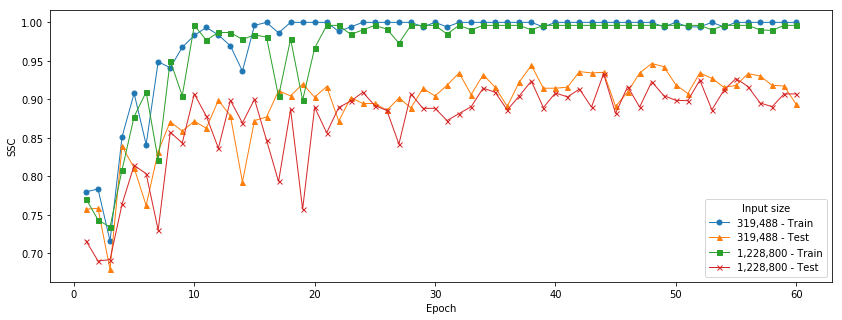

In [28]:
matplotlib.rcParams['figure.figsize'] = [14, 5]
x = AddOneToListOfNumbers(list(df5CEO['epoch']))

# SSC Score Experiments 

plt.plot(x,df5CEFS['trainSimRN'], marker='o', linewidth=1, markersize=5, label='319,488 - Train')
plt.plot(x,df5CEFS['testSimRN'], marker='^', linewidth=1, markersize=5, label='319,488 - Test')

plt.plot(x,df5CEFL['trainSimRN'], marker='s', linewidth=1, markersize=5, label='1,228,800 - Train')
plt.plot(x,df5CEFL['testSimRN'], marker='x', linewidth=1, markersize=5, label='1,228,800 - Test')

# y-axis limits
# plt.ylim([0.2,0.45])
# x-axis label 
plt.xlabel('Epoch') 
# y-axis label 
plt.ylabel('SSC') 
# show legend
plt.legend(title="Input size",loc=4)
# function to show the plot 
plt.show()

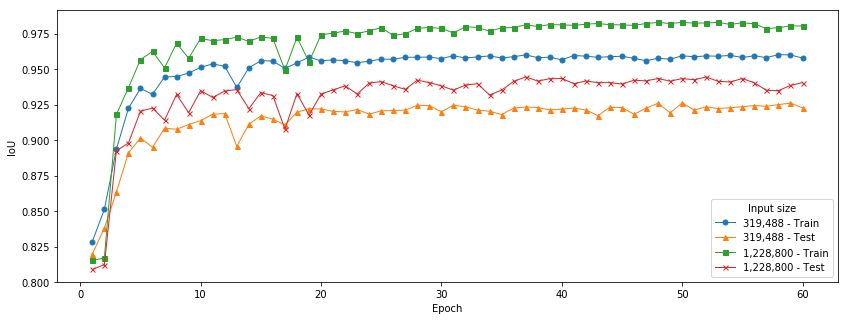

In [29]:
matplotlib.rcParams['figure.figsize'] = [14, 5]
x = AddOneToListOfNumbers(list(df5CEO['epoch']))

# SSC Score Experiments 

plt.plot(x,df5CEFS['train'], marker='o', linewidth=1, markersize=5, label='319,488 - Train')
plt.plot(x,df5CEFS['test'], marker='^', linewidth=1, markersize=5, label='319,488 - Test')

plt.plot(x,df5CEFL['train'], marker='s', linewidth=1, markersize=5, label='1,228,800 - Train')
plt.plot(x,df5CEFL['test'], marker='x', linewidth=1, markersize=5, label='1,228,800 - Test')

# y-axis limits
# plt.ylim([0.2,0.45])
# x-axis label 
plt.xlabel('Epoch') 
# y-axis label 
plt.ylabel('IoU') 
# show legend
plt.legend(title="Input size",loc=4)
# function to show the plot 
plt.show()